In [1]:
import os, sys
import time
import datetime
import pandas as pd
import numpy as np
import math
from math import radians, cos, sin, asin, sqrt 
import random


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.patches import Ellipse, Circle

ROOTDIR = os.path.abspath(os.path.realpath('./')) + '/Py'

sys.path.append(os.path.join(ROOTDIR, ''))

import dgckernel

import geopandas as gp
import shapely



# Parameter

In [2]:
'''Basic Path'''

Daily_path='./Data/Daily_Feature/'

Load_path='./Data/Processed/'

Save_path='./Data/MCMF/'


'''Param'''

End_step=144

'''Location list'''

Location_list=np.load(os.path.join(Load_path,'Location_list.npy'))

Location_ID_dic=np.load(os.path.join(Load_path,'Location_ID_dic.npy')).item()

Location_ID_dic_reverse=np.load(os.path.join(Load_path,'Location_ID_dic_reverse.npy')).item()

'''Location Center'''

Location_Center_dic=np.load(os.path.join(Load_path,'Location_Center_dic.npy')).item()


'''Connection Matrix and Network distance Matrix'''

Connect_matrix=np.load(os.path.join(Load_path,'Connect_matrix.npy'))

Network_Distance=np.load(os.path.join(Load_path,'Network_Distance.npy'))

'''Geometry_dic'''

Geometry_dic=np.load(os.path.join(Load_path,'Geometry_dic.npy')).item()


'''State and Action'''

State=np.load(os.path.join(Load_path,'State.npy'))

Action=np.load(os.path.join(Load_path,'Action.npy')).item()

'''Driver group'''

data_str='2019-11-01'

'''Simulation'''

Request_count_dic=np.load(os.path.join(Daily_path,'Request_count_dic'+data_str+'.npy')).item()

# Visualization

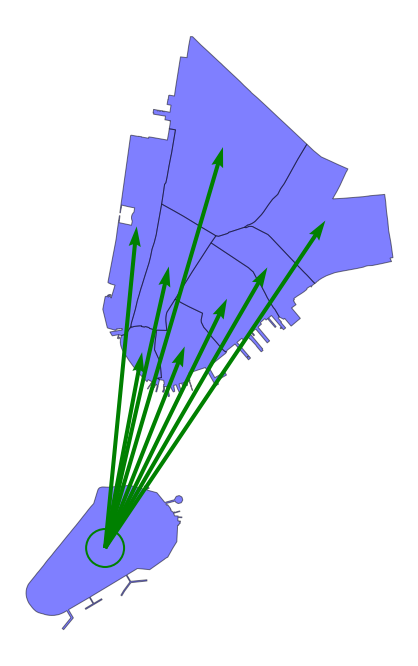

In [5]:
sample_loc=103

sample_step=120

state=str(sample_loc)+'-'+str(sample_step)

sample_Action=Action[state]

sample_Hot=[int(Request_count_dic[str(a)+'-'+str(sample_step+1)]) for a in Action[state]]

Walk_prob=[round(float(h)/sum(sample_Hot),2) for h in sample_Hot]




'''Plot the initialized coordinates of drivers'''

figsize = 8,12

fig,ax = plt.subplots(figsize=figsize)

for i in range(len(sample_Action)):
    
    loc=sample_Action[i]
    
    geometry=gp.GeoSeries(Geometry_dic[loc])

    geometry.plot(ax=ax,alpha=0.5,color='b',edgecolor='black')
    
X_1 =Location_Center_dic[sample_loc][0];Y_1 =Location_Center_dic[sample_loc][1]
    
for i in range(len(sample_Action)):
    
    loc=sample_Action[i]
    
    X_2 =X_1+(Location_Center_dic[loc][0]-X_1)
    
    Y_2 =Y_1+(Location_Center_dic[loc][1]-Y_1)
    
    U = round(X_2-X_1,5);V = round(Y_2-Y_1,5)
    
    if loc==sample_loc:
    
        cir=Circle(xy = (X_1,Y_1), radius=500, alpha=1,color = 'g',linewidth=2, fill = False)

        ax.add_patch(cir)
        
    else:
    
        plt.quiver(X_1,Y_1,U,V, angles='xy', scale_units='xy', scale=1,color='g',width=.01,headwidth=3,alpha=1,linestyle='--')
    
    


    
    
'''Turn off the axis'''
plt.xticks([])  
plt.yticks([])  
plt.axis('off')  


plt.show()  
    
